## Preparación IDE  



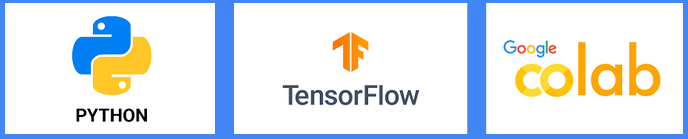

In [2]:
!pip install -q sklearn # Una librería de machine learning para python

In [3]:
%tensorflow_version 2.x # Selecciona TF es la 2.0

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x # Selecciona TF es la 2.0`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [5]:
# Importación de librerías y módulos necesarios para regresión lineal

from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np # módulo con versión mejorada de arrays en python para cálculos con arrays multidimensionales
import pandas as pd # módulo para manipular y visualizar datasets 
import matplotlib.pyplot as plt # módulo para pintar gráficas
from IPython.display import clear_output # específico para limpiar el output de este IDE
from six.moves import urllib #

import tensorflow.compat.v2.feature_column as fc # Feature Column es un requerimiento para usar Regresión Lineal

import tensorflow as tf 

## TRATAMIENTO DE LOS DATOS

In [6]:
# CARGA DE DATOS

# Carga de datos para entrenar el modelo en un "Dataframe" que es como una tabla
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # training data

# Datos para testear el modelo (medir su valor predictivo)
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # testing data


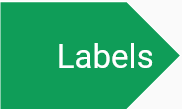

In [7]:
# Apartamos la columna de resultados de cada dataset
y_train = dftrain.pop('survived') # entrenamiento
y_eval = dfeval.pop('survived') # test

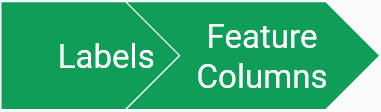

In [8]:
# TRATAMIENTO DE DATOS

# Datos discretos
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck', 'embark_town', 'alone']
# Datos numéricos
NUMERIC_COLUMNS = ['age', 'fare']



In [9]:
# Generación y adición de feature columns

feature_columns = [] # declaración de array

for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique() # crea un diccionario con los nombres únicos
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary)) # produce feature columns a partir del diccionario

for feature_name in NUMERIC_COLUMNS: # con valores numéricos no es necesario crear un diccionario
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32 ))

## INPUT FUNCTION

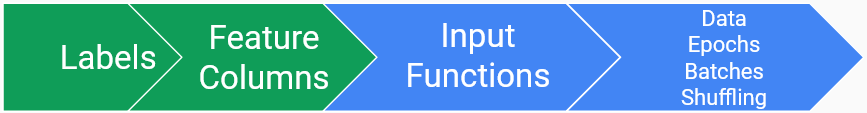

### Definición

In [10]:
# Definimos una función creadora de Input functions

# Parámetros:
# - datos
# - label
# - epochs
# - randomizado
# - tamaño de batch

def make_input_fn(data_df, label_df, num_epochs=12, shuffle=True, batch_size=32):
  def input_function(): # función interna, que será devuelta por la función envolvente
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df)) # crea un objeto tf.data.Dataset 
    if shuffle:
      ds = ds.shuffle(1000) # randomizado de datos (registros entran de forma aleatoria)
    ds = ds.batch(batch_size).repeat(num_epochs)
    return ds # devuelve un batch del dataset
  return input_function # devuelve una input function


### Instanciación de Input Functions

In [11]:
# usando la función creadora de input functions

# creamos las inputs functions

# INPUT FUNCTION para DATOS DE ENTRENAMIENTO
train_input_fn = make_input_fn(dftrain, y_train) # esta función, devuelve una input function con los datos de entrenamiento, que podremos usar para entrenar el modelo

# INPUT FUNCTION para DATOS DE EVALUACIÓN
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False) # input function con los datos de evaluación

## INSTANCIACIÓN DEL MODELO

In [12]:
# Instanciamos modelo a partir de las feature columns
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns )



INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmppzo39xdx', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


## ENTRENAMIENTO DEL MODELO


In [13]:
# Entrenamos el modelo usando la input function de los datos de entrenamiento
linear_est.train(train_input_fn)



Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1700: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmppzo39xdx/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 0.6931472, step = 0
INFO:tensorflow:global_step/sec: 298.881
INFO:tensorflow:loss = 0.64886403, step = 100 (0.340 sec)
INFO:tensorflow:global_step/sec: 609.585
INFO:tensorflow:loss = 0.48085266, step = 200 (0.164 sec)
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 240...
INFO:tensorflow:Saving checkpoints for 240 into /tmp/tmppzo39xdx/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving ch

## EVALUACIÓN DEL MODELO

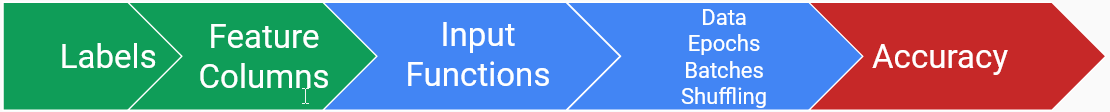

In [14]:
result = linear_est.evaluate(eval_input_fn) # Evaluamos el modelo con la input function de datos de evaluación
clear_output() # limpiamos consola
print(result['accuracy']) # Cálculo tras comparar la supervivencia real de TODOS los pasajeros, respecto a lo que el modelo había predicho. Es un valor agregado.

# Probar
# Ejecutar de nuevo este bloque -> varía el randomizado de entrenamiento con los datos
# Cambiar parámetros de input function -> epochs, batches

0.7613636


## USO DEL MODELO 

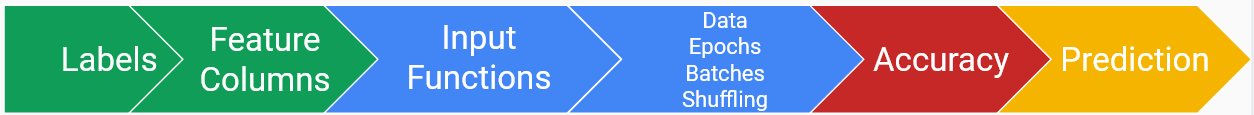

PREDICCIÓN PASAJERO A PASAJERO

In [15]:
# Vamos a usar el modelo para hacer predicciones sobre CADA UNO DE LOS PASAJEROS DEL TITANIC
# Al igual que necesitamos una input function para entrenar el modelo, también necesitamos darle una input function para hacer predicciones
# Esa vez le damos la input function de los datos de evaluación (hey, modelo, si el pasajero tiene estas características cuáles son sus probabilidades de sobrevivir?)
pred_dicts = list(linear_est.predict(eval_input_fn)) # Crea una lista key:value con la probabilidad


INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1700: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmppzo39xdx/model.ckpt-240
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [16]:
print(pred_dicts) # aquí están almacenados diccionarios de predicción, uno por pasajero

[{'logits': array([-2.920379], dtype=float32), 'logistic': array([0.05115533], dtype=float32), 'probabilities': array([0.94884473, 0.05115531], dtype=float32), 'class_ids': array([0]), 'classes': array([b'0'], dtype=object), 'all_class_ids': array([0, 1], dtype=int32), 'all_classes': array([b'0', b'1'], dtype=object)}, {'logits': array([-1.0197151], dtype=float32), 'logistic': array([0.26508296], dtype=float32), 'probabilities': array([0.73491704, 0.26508287], dtype=float32), 'class_ids': array([0]), 'classes': array([b'0'], dtype=object), 'all_class_ids': array([0, 1], dtype=int32), 'all_classes': array([b'0', b'1'], dtype=object)}, {'logits': array([0.36382142], dtype=float32), 'logistic': array([0.58996516], dtype=float32), 'probabilities': array([0.41003484, 0.58996516], dtype=float32), 'class_ids': array([1]), 'classes': array([b'1'], dtype=object), 'all_class_ids': array([0, 1], dtype=int32), 'all_classes': array([b'0', b'1'], dtype=object)}, {'logits': array([-0.04963538], dtype

REPASAR ESTO

In [17]:
print(pred_dicts[0]['probabilities'][1]) # Probabilidad de supervivencia del pasajero 0

print(dfeval.loc[0]) # Valores del dataframe asociados al primer pasajero
print(y_eval.loc[0]) # ¿Sobrevivió o no?

0.051155306
sex                          male
age                            35
n_siblings_spouses              0
parch                           0
fare                         8.05
class                       Third
deck                      unknown
embark_town           Southampton
alone                           y
Name: 0, dtype: object
0


In [18]:
print(pred_dicts[1]['probabilities'][1]) # Probabilidad de supervivencia del pasajero 0

print(dfeval.loc[1]) # Valores del dataframe asociados al primer pasajero
print(y_eval.loc[1]) # ¿Sobrevivió o no?

0.26508287
sex                          male
age                            54
n_siblings_spouses              0
parch                           0
fare                      51.8625
class                       First
deck                            E
embark_town           Southampton
alone                           y
Name: 1, dtype: object
0


In [19]:
print(pred_dicts[3]['probabilities'][1]) # Probabilidad de supervivencia del pasajero 1

print(dfeval.loc[3]) # Valores del dataframe asociados al primer pasajero
print(y_eval.loc[3]) # ¿Sobrevivió o no?

0.4875937
sex                        female
age                            55
n_siblings_spouses              0
parch                           0
fare                           16
class                      Second
deck                      unknown
embark_town           Southampton
alone                           y
Name: 3, dtype: object
1


In [ ]:
print(pred_dicts[8]['probabilities'][1]) # Probabilidad de supervivencia del pasajero 1

print(dfeval.loc[8]) # Valores del dataframe asociados al primer pasajero
print(y_eval.loc[8]) # ¿Sobrevivió o no?

0.47457877
sex                        female
age                            18
n_siblings_spouses              2
parch                           0
fare                           18
class                       Third
deck                      unknown
embark_town           Southampton
alone                           n
Name: 8, dtype: object
0


USO DEL MODELO: ESTADÍSTICAS DE CONJUNTO

INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1700: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp56344mfa/model.ckpt-240
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


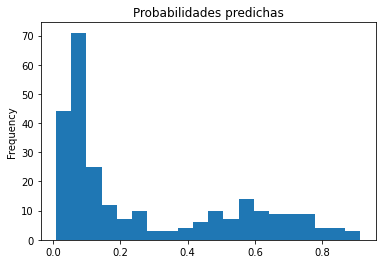

In [ ]:
# Crea 
pred_dicts = list(linear_est.predict(eval_input_fn)) # Devuelve una lista de diccionarios de supervivencia
probs = pd.Series([pred['probabilities'][1] for pred in pred_dicts]) # clasifica en los datos por probabilidad de supervivencia
probs.plot(kind='hist', bins=20, title='Probabilidades predichas') # pinta la clasificación anterior

# Vemos que, por ejemplo, lo más frecuente es que la probabilidad de supervivencia esté entre el 0 y el 20%.

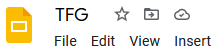



https://docs.google.com/presentation/d/1STJa6Y-eUsm4FEWhEbTbjiIWB2Aywi_u3WYa9N30P1c/edit#slide=id.gc6f919934_0_24